In [201]:
# Import Dependencies
import pandas as pd
import numpy as np

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [202]:
# https://gml.noaa.gov/ccgg/trends/data.html
# Mauna Loa CO2 annual mean data( text) or (CSV)
# CO2 data from 1959 to 2015

file = "CO2_DataSet_1.csv"

# Read the  csv and store into Pandas DataFrame
co2_df = pd.read_csv(file, encoding="utf-8")
# co2_df

In [203]:
co2_clean_df = co2_df.iloc[:,[0,1]]
co2_clean_df = co2_clean_df.rename(columns={"year":"Year","mean":"CO2(ppm)"})
co2_clean_df

,Year,CO2(ppm)
0,1959.0,315.98
1,1960.0,316.91
2,1961.0,317.64
3,1962.0,318.45
4,1963.0,318.99
...,...,...
58,2017.0,406.76
59,2018.0,408.72
60,2019.0,411.66
61,2020.0,414.24


In [204]:
co2_clean_df.dropna(subset = ['Year'], inplace=True)
co2_clean_df

,Year,CO2(ppm)
0,1959.0,315.98
1,1960.0,316.91
2,1961.0,317.64
3,1962.0,318.45
4,1963.0,318.99
...,...,...
57,2016.0,404.41
58,2017.0,406.76
59,2018.0,408.72
60,2019.0,411.66


In [205]:
# Show data types for all columns 
# co2_clean_df.dtypes

co2_clean_df['Year'] = co2_clean_df.loc[:,'Year'].astype(int)
# co2_clean_df.info()
# co2_clean_df


In [206]:
# https://www.ncei.noaa.gov/access/paleo-search/?dataTypeId=7
# CO2 concentration from ice core samples
# CO2 data from 1000 to 2004

file = "smoothedco2.csv"

# Read the  csv and store into Pandas DataFrame
ice_co2_df = pd.read_csv(file, encoding="utf-8")
ice_co2_df

,Year,ALL_50_full,LD_050,DML_050,ALL_050,LD_075,DML_075,ALL_075,LD_100,DML_100,...,ALL_125,LD_150,DML_150,ALL_150,LD_175,DML_175,ALL_175,LD_200,DML_200,ALL_200
0,1000,278.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,278.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,278.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,278.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,278.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2000,366.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,2001,368.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,2002,369.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,2003,371.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
ice_co2_clean_df = ice_co2_df.iloc[:,[0,1]]
ice_co2_clean_df = ice_co2_clean_df.rename(columns={"ALL_50_full":"CO2(ppm)"})
ice_co2_clean_df

,Year,CO2(ppm)
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72
...,...,...
1000,2000,366.40
1001,2001,368.03
1002,2002,369.66
1003,2003,371.30


In [208]:
# Show data types for all columns 
# ice_co2_clean_df.dtypes


In [228]:
co2_merge = pd.merge(co2_clean_df,ice_co2_clean_df,how='outer',on='Year')
co2_merge = co2_merge.sort_values(by=["Year"])

co2_merge.reset_index(inplace=True) # data1.reset_index(inplace=True)
co2_merge = co2_merge.iloc[:,[1,2,3]]

co2_merge.head(2000)

,Year,CO2(ppm)_x,CO2(ppm)_y
0,1000,NaN,278.66
1,1001,NaN,278.68
2,1002,NaN,278.69
3,1003,NaN,278.71
4,1004,NaN,278.72
...,...,...,...
1016,2016,404.41,NaN
1017,2017,406.76,NaN
1018,2018,408.72,NaN
1019,2019,411.66,NaN


In [210]:
# Average CO2 Values when 2 values exist for a given year
co2_merge["CO2(ppm)"] = co2_merge[['CO2(ppm)_x', 'CO2(ppm)_y']].mean(axis=1)
co2_merge = co2_merge.iloc[:,[0,3]]
co2_merge


,Year,CO2(ppm)
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72
...,...,...
1016,2016,404.41
1017,2017,406.76
1018,2018,408.72
1019,2019,411.66


In [211]:
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
# Global Ave Temp data from 1750 to 2004

file = "GlobalTemperatures.csv"

# Read the  csv and store into Pandas DataFrame
temp_df = pd.read_csv(file, encoding="utf-8")
temp_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [212]:
temp_df['Year'] = temp_df['dt'].str[:4]
temp_df = temp_df.rename(columns={"LandAverageTemperature":"Temp"})
# temp_df
temp_df = temp_df.loc[:,["Year","Temp"]]
temp_df

,Year,Temp
0,1750,3.034
1,1750,3.083
2,1750,5.626
3,1750,8.490
4,1750,11.573
...,...,...
3187,2015,14.755
3188,2015,12.999
3189,2015,10.801
3190,2015,7.433


In [213]:
# Dataset is monthly (note I stripped the months and only left the year).  
# Average Temp by year
annual_temp=temp_df.groupby('Year').mean()
annual_temp.reset_index(inplace=True)
annual_temp

,Year,Temp
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [214]:
# ice_co2_clean_df.dtypes
annual_temp['Year'] = annual_temp.loc[:,'Year'].astype(int)
co2_merge.dtypes
annual_temp.dtypes


Year      int64
Temp    float64
dtype: object

In [215]:
temp_co2 = pd.merge(co2_merge,annual_temp,how='inner',on='Year')
temp_co2

,Year,CO2(ppm),Temp
0,1750,277.03,8.719364
1,1751,277.02,7.976143
2,1752,277.00,5.779833
3,1753,276.99,8.388083
4,1754,276.99,8.469333
...,...,...,...
261,2011,391.85,9.516000
262,2012,394.06,9.507333
263,2013,396.74,9.606500
264,2014,398.87,9.570667


<AxesSubplot:xlabel='Year', ylabel='Temp'>

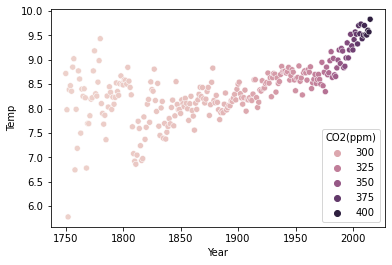

In [217]:
import seaborn as sns
sns.scatterplot(x="Year",y="Temp",hue="CO2(ppm)",data=temp_co2)

<AxesSubplot:xlabel='Year', ylabel='CO2(ppm)'>

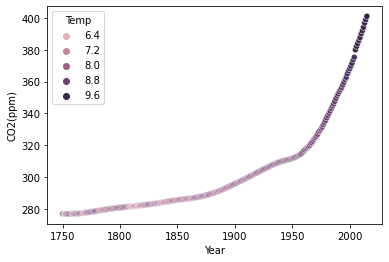

In [218]:
import seaborn as sns
sns.scatterplot(x="Year",y="CO2(ppm)",hue="Temp",data=temp_co2)

<AxesSubplot:xlabel='CO2(ppm)', ylabel='Temp'>

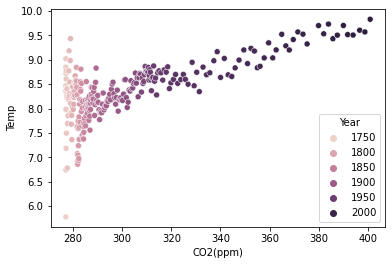

In [219]:
import seaborn as sns
sns.scatterplot(x="CO2(ppm)",y="Temp",hue="Year",data=temp_co2)

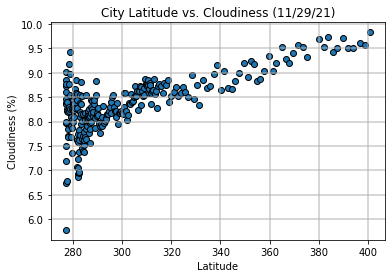

In [216]:
plt.scatter(temp_co2["CO2(ppm)"], temp_co2["Temp"], edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

# plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

In [225]:
new_temp_co2=temp_co2[temp_co2["Year"]>=1850]
new_temp_co2

,Year,CO2(ppm),Temp
100,1850,285.77,7.900667
101,1851,285.86,8.178583
102,1852,285.96,8.100167
103,1853,286.05,8.041833
104,1854,286.14,8.210500
...,...,...,...
261,2011,391.85,9.516000
262,2012,394.06,9.507333
263,2013,396.74,9.606500
264,2014,398.87,9.570667


<AxesSubplot:xlabel='CO2(ppm)', ylabel='Temp'>

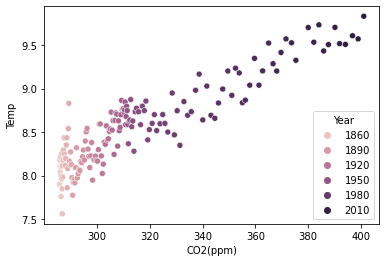

In [226]:
import seaborn as sns
sns.scatterplot(x="CO2(ppm)",y="Temp",hue="Year",data=new_temp_co2)